<center> <h1 style="background-color:DarkSlateBlue; color:white" >A/B Testing: Step by Step & Hypothesis Testing</h1> 

<center><img
src="https://tactilegames.com/wp-content/uploads/2018/05/cookie-cats.png" style="width:40%;height:40%;">
</center>
    
<br>    
    
<div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" style="background-color:DarkSlateBlue; color:white" data-toggle="list"  role="tab" aria-controls="home">Notebook Content!</h3>  
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#libraries" role="tab" aria-controls="profile" style="color:DarkSlateBlue">Import Libraries<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">1</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#load" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Load Data<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">2</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#summary" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Summary Stats<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">3</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#outliers" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Outliers<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">4</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#details" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Some Details<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">5</span></a>
  <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#ab" role="tab" aria-controls="messages" style="color:DarkSlateBlue">A/B Testing<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">6</span></a>   <a id="section2" class="list-group-item list-group-item-action" data-toggle="list" href="#conclusion" role="tab" aria-controls="messages" style="color:DarkSlateBlue">Conclusion<span class="badge badge-primary badge-pill" style="background-color:DarkSlateBlue; color:white">7</span></a>

### Resources

First of all, thanks a lot to [**Aurelia Sui ( @yufengsui )**](https://www.kaggle.com/yufengsui)for this dataset & his [**introduction notebook**](https://www.kaggle.com/yufengsui/datacamp-project-mobile-games-a-b-testing).

### How can I learn A/B Testing?

**DataCamp:** 
- [**Mobile Games A/B Testing with Cookie Cats**](https://www.datacamp.com/projects/184)
- [**A/B Testing in R**](https://learn.datacamp.com/courses/ab-testing-in-r)
- [**Customer Analytics and A/B Testing in Python**](https://learn.datacamp.com/courses/customer-analytics-and-ab-testing-in-python)

**Udacity:** 
- [**A/B Testing by Google - Online Experiment Design and Analysis**](https://www.udacity.com/course/ab-testing--ud257)
- [**Intro to Inferential Statistics**](https://www.udacity.com/course/intro-to-inferential-statistics--ud201)
- [**Statistics by San Jose State University - The Science of Decisions**](https://www.udacity.com/course/statistics--st095)

### Project Description from [**DataCamp**](https://www.datacamp.com/projects/184)

Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding!

**As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds**.

To complete this project, you should be comfortable working with pandas DataFrames and with using the pandas plot method. You should also have some understanding of hypothesis testing and bootstrap analysis.

<center><iframe width="560" height="315" src="https://www.youtube.com/embed/0G-612U2vQY" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe></iframe></center>


### Data Description from [**Aurelia Sui's notebook**](https://www.kaggle.com/yufengsui/datacamp-project-mobile-games-a-b-testing)

<p>The data is from 90,189 players that installed the game while the AB-test was running. The variables are:</p>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the test group (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first week after installation
<li><code>retention_1</code> - did the player come back and play 1 day after installing?</li>
<li><code>retention_7</code> - did the player come back and play 7 days after installing?</li>
</ul>
<p>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. </p>

### AB Testing Process

1. Understanding business problem & data
2. Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
3. Look summary stats and plots
4. Apply hypothesis testing and check assumptions
    - Check Normality & Homogeneity
    - Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
        - shapiro tests: tests the normality of the data
        - lavene test: The equality of the variances
        - Welch Test: unequal variances T Test
5. Evaluate the results
6. Make inferences 
7. Recommend business decision to your customer/director/ceo etc. 

<a id='libraries'></a>
<h1 style="color:DarkSlateBlue" >1. PACKAGES</h1>

In [1]:
# Base
# -----------------------------------
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Hypothesis Testing
# -----------------------------------
from scipy.stats import shapiro
import scipy.stats as stats

# Configuration
# -----------------------------------
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.4f}'.format

<a id='load'></a>
<h1 style="color:DarkSlateBlue" >2. DATA</h1>

In [17]:
path = "cookie_cats.csv"

def load(path, info = True):
    
    import pandas as pd
    import io
    
    if len(path.split(".csv")) > 1:
        read = pd.read_csv(path)
    elif len(path.split(".xlsx")) > 1:
        read = pd.read_excel(path)
    
    if info:
        if len(read) > 0:
            print("# Data imported!")
            print("# ------------------------------------", "\n")
        
            print("# DIMENSIONS -------------------------")
            print("Observation:", read.shape[0], "Column:", read.shape[1], "\n")
    
            print("# DTYPES -----------------------------")
            if len(read.select_dtypes("object").columns) > 0:
                print("Object Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("object").columns), "\n", 
                      read.select_dtypes("object").columns.tolist(), "\n")
    
            if len(read.select_dtypes("integer").columns) > 0:
                print("Integer Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("integer").columns), "\n", 
                      read.select_dtypes("integer").columns.tolist(), "\n")
    
            if len(read.select_dtypes("float").columns) > 0:
                print("Float Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("float").columns), "\n", 
                      read.select_dtypes("float").columns.tolist(), "\n")
    
            if len(read.select_dtypes("bool").columns) > 0:
                print("Bool Variables:", "\n", "# of Variables:", 
                      len(read.select_dtypes("bool").columns), "\n", 
                      read.select_dtypes("bool").columns.tolist(), "\n")
    
            print("# MISSING VALUE ---------------------")
            print("Are there any missing values? \n ", np.where(read.isnull().values.any() == False, 
                                                            "No missing value!", "Data includes missing value!"), "\n")
            
            buf = io.StringIO()
            read.info(buf=buf)
            info = buf.getvalue().split('\n')[-2].split(":")[1].strip()
            print("# MEMORY USAGE ---------------------- \n", info)
          
        else:
            print("# Data did not import!")
    
    return read
    
ab = load(path, info = True)
ab.head()

# Data imported!
# ------------------------------------ 

# DIMENSIONS -------------------------
Observation: 90189 Column: 5 

# DTYPES -----------------------------
Object Variables: 
 # of Variables: 1 
 ['version'] 

Integer Variables: 
 # of Variables: 2 
 ['userid', 'sum_gamerounds'] 

Bool Variables: 
 # of Variables: 2 
 ['retention_1', 'retention_7'] 

# MISSING VALUE ---------------------
Are there any missing values? 
  No missing value! 

# MEMORY USAGE ---------------------- 
 2.2+ MB


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


<a id='summary'></a>
<h1 style="color:DarkSlateBlue" >3. SUMMARY STATS</h1>

In [3]:
# Number of Unique User
print(ab.userid.nunique() == ab.shape[0])
# Summary Stats: sum_gamerounds
ab.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

True


,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90189.0000,51.8725,195.0509,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,49854.0000


In [4]:
# A/B Groups & Target Summary Stats
ab.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0000,52.4563,256.7164,49854
gate_40,45489,16.0000,51.2988,103.2944,2640


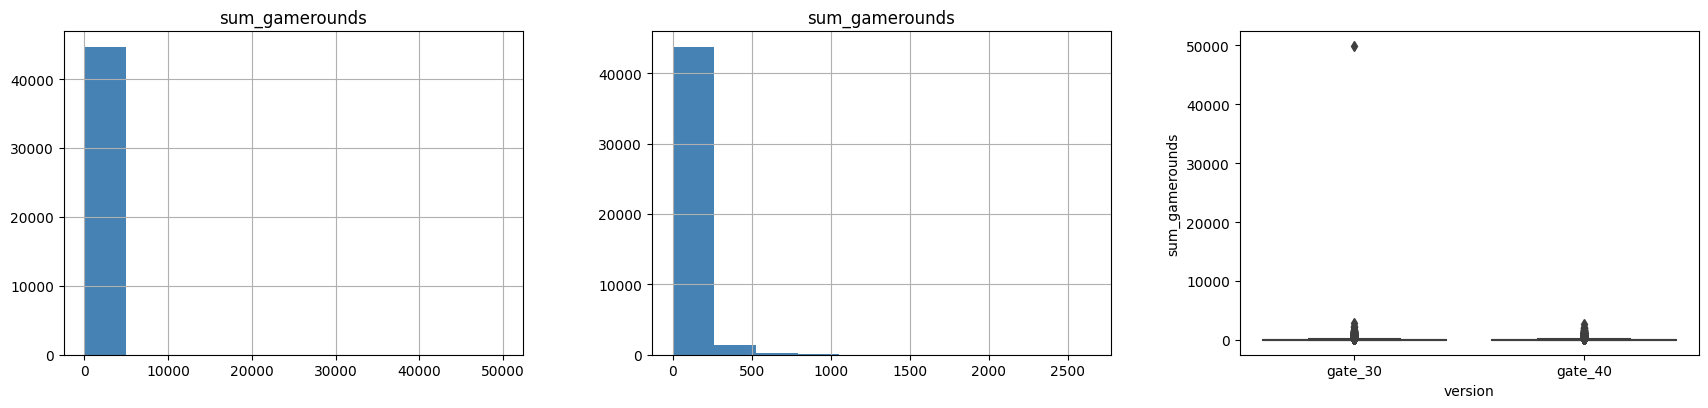

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (18,5))
ab[(ab.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
ab[(ab.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = ab.version, y = ab.sum_gamerounds, ax = axes[2])


plt.tight_layout(pad = 4)

In [11]:
plt.suptitle("Before Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)
plt.show()

<Figure size 640x480 with 0 Axes>

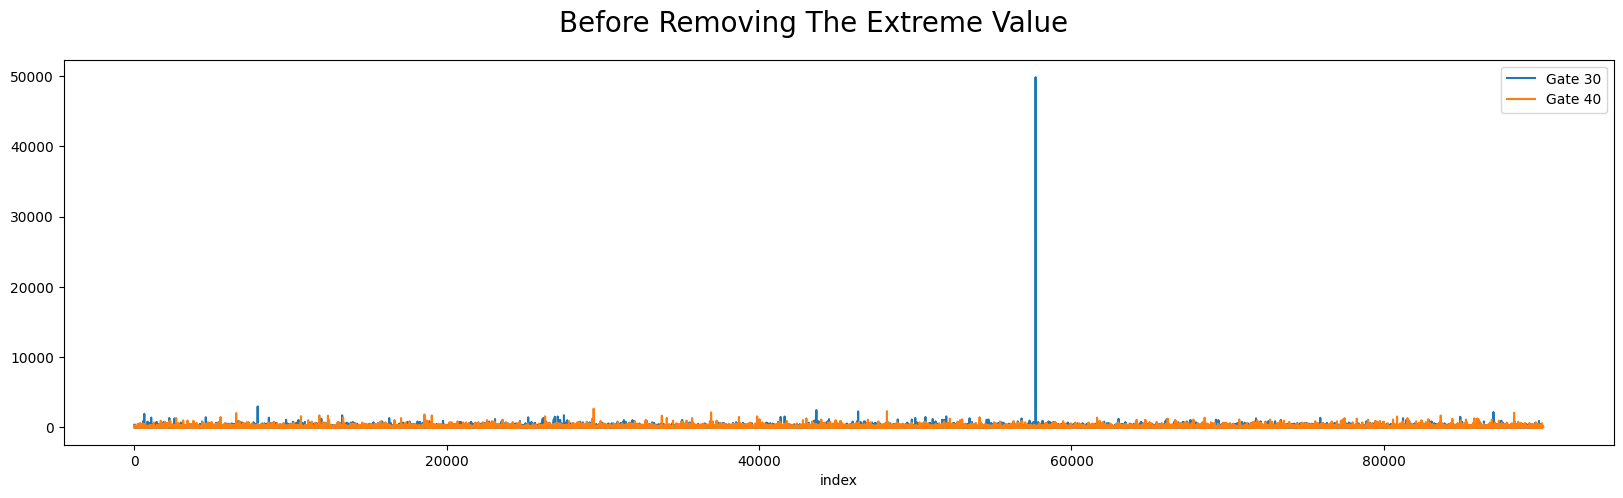

In [12]:
ab[ab.version == "gate_30"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
ab[ab.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40")
plt.suptitle("Before Removing The Extreme Value", fontsize = 20);

<a id='outliers'></a>
<h1 style="color:DarkSlateBlue" >4. OUTLIERS</h1>

In [19]:
ab_no_max = ab[ab.sum_gamerounds < ab.sum_gamerounds.max()]

# Summary Stats: sum_gamerounds
ab_no_max.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0000,51.3203,102.6827,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,493.0000,2961.0000


In [20]:
ab_less_2000 = ab[ab.sum_gamerounds < 2000]

# Summary Stats: sum_gamerounds
ab_less_2000.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90179.0000,51.0931,100.0977,0.0000,0.0000,1.0000,1.0000,3.0000,16.0000,67.0000,134.0000,221.0000,491.0000,1906.0000


<Axes: xlabel='sum_gamerounds', ylabel='Count'>

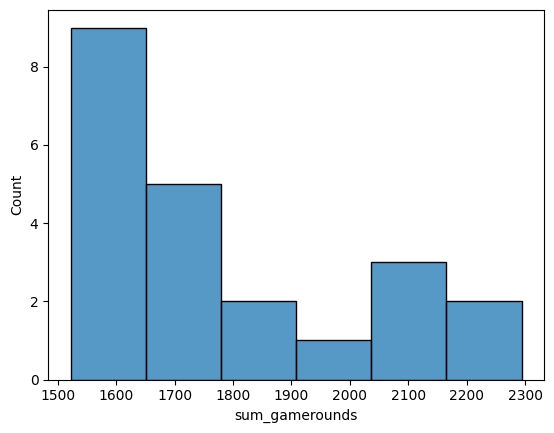

In [22]:
ab_greater_1500 = ab[(ab.sum_gamerounds > 1500) & (ab.sum_gamerounds < 2300) ]

sns.histplot(ab_greater_1500["sum_gamerounds"])

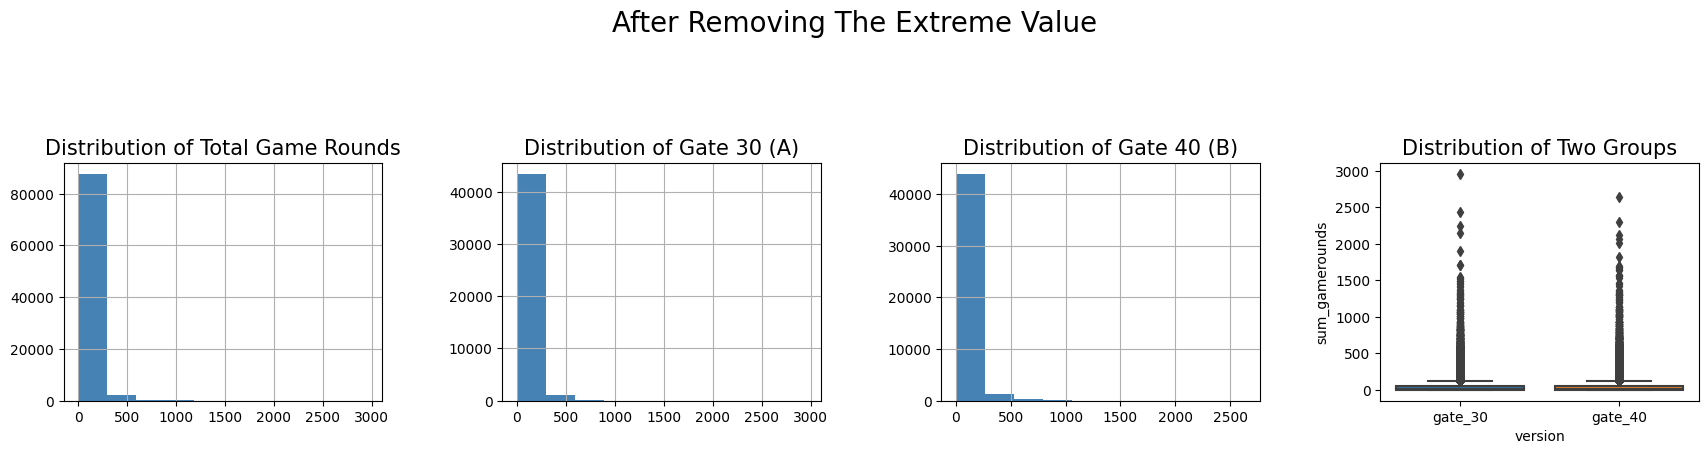

In [24]:
fig, axes = plt.subplots(1, 4, figsize = (18,5))
ab_no_max.sum_gamerounds.hist(ax = axes[0], color = "steelblue")
ab_no_max[(ab_no_max.version == "gate_30")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
ab_no_max[(ab_no_max.version == "gate_40")].hist("sum_gamerounds", ax = axes[2], color = "steelblue")
sns.boxplot(x = ab_no_max.version, y = ab_no_max.sum_gamerounds, ax = axes[3])

plt.suptitle("After Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Total Game Rounds", fontsize = 15)
axes[1].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[2].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[3].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4);

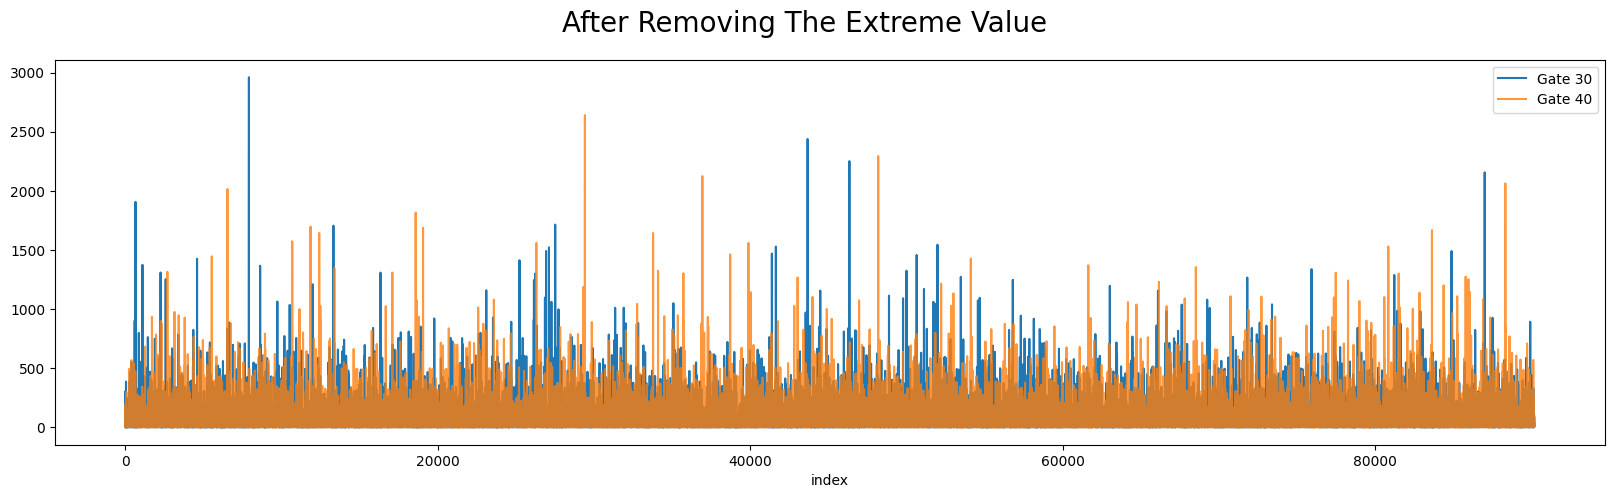

In [25]:
ab_no_max[(ab_no_max.version == "gate_30")].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 30", figsize = (20,5))
ab_no_max[ab_no_max.version == "gate_40"].reset_index().set_index("index").sum_gamerounds.plot(legend = True, label = "Gate 40", alpha = 0.8)
plt.suptitle("After Removing The Extreme Value", fontsize = 20);

<a id='details'></a>
<h1 style="color:DarkSlateBlue" >5. SOME DETAILS</h1>

**The users installed the game but 3994 users never played the game!** Some reasons might explain this situation.

- They have no free time to play game
- Users might prefer to play other games or they play other games already
- Some users don't like the app etc.
- You can comment below for this users also
- bots installed the game

**The number of users decreases as the levels progress**

- Most of users played the game at early stage and they didn't progress.
- Tactile Entertainment should learn why users churn playing the game.
- Doing research and collecting data about the game and users would help to understand user churn
- The difficulty of the game can be measured
- Gifts might help player retention

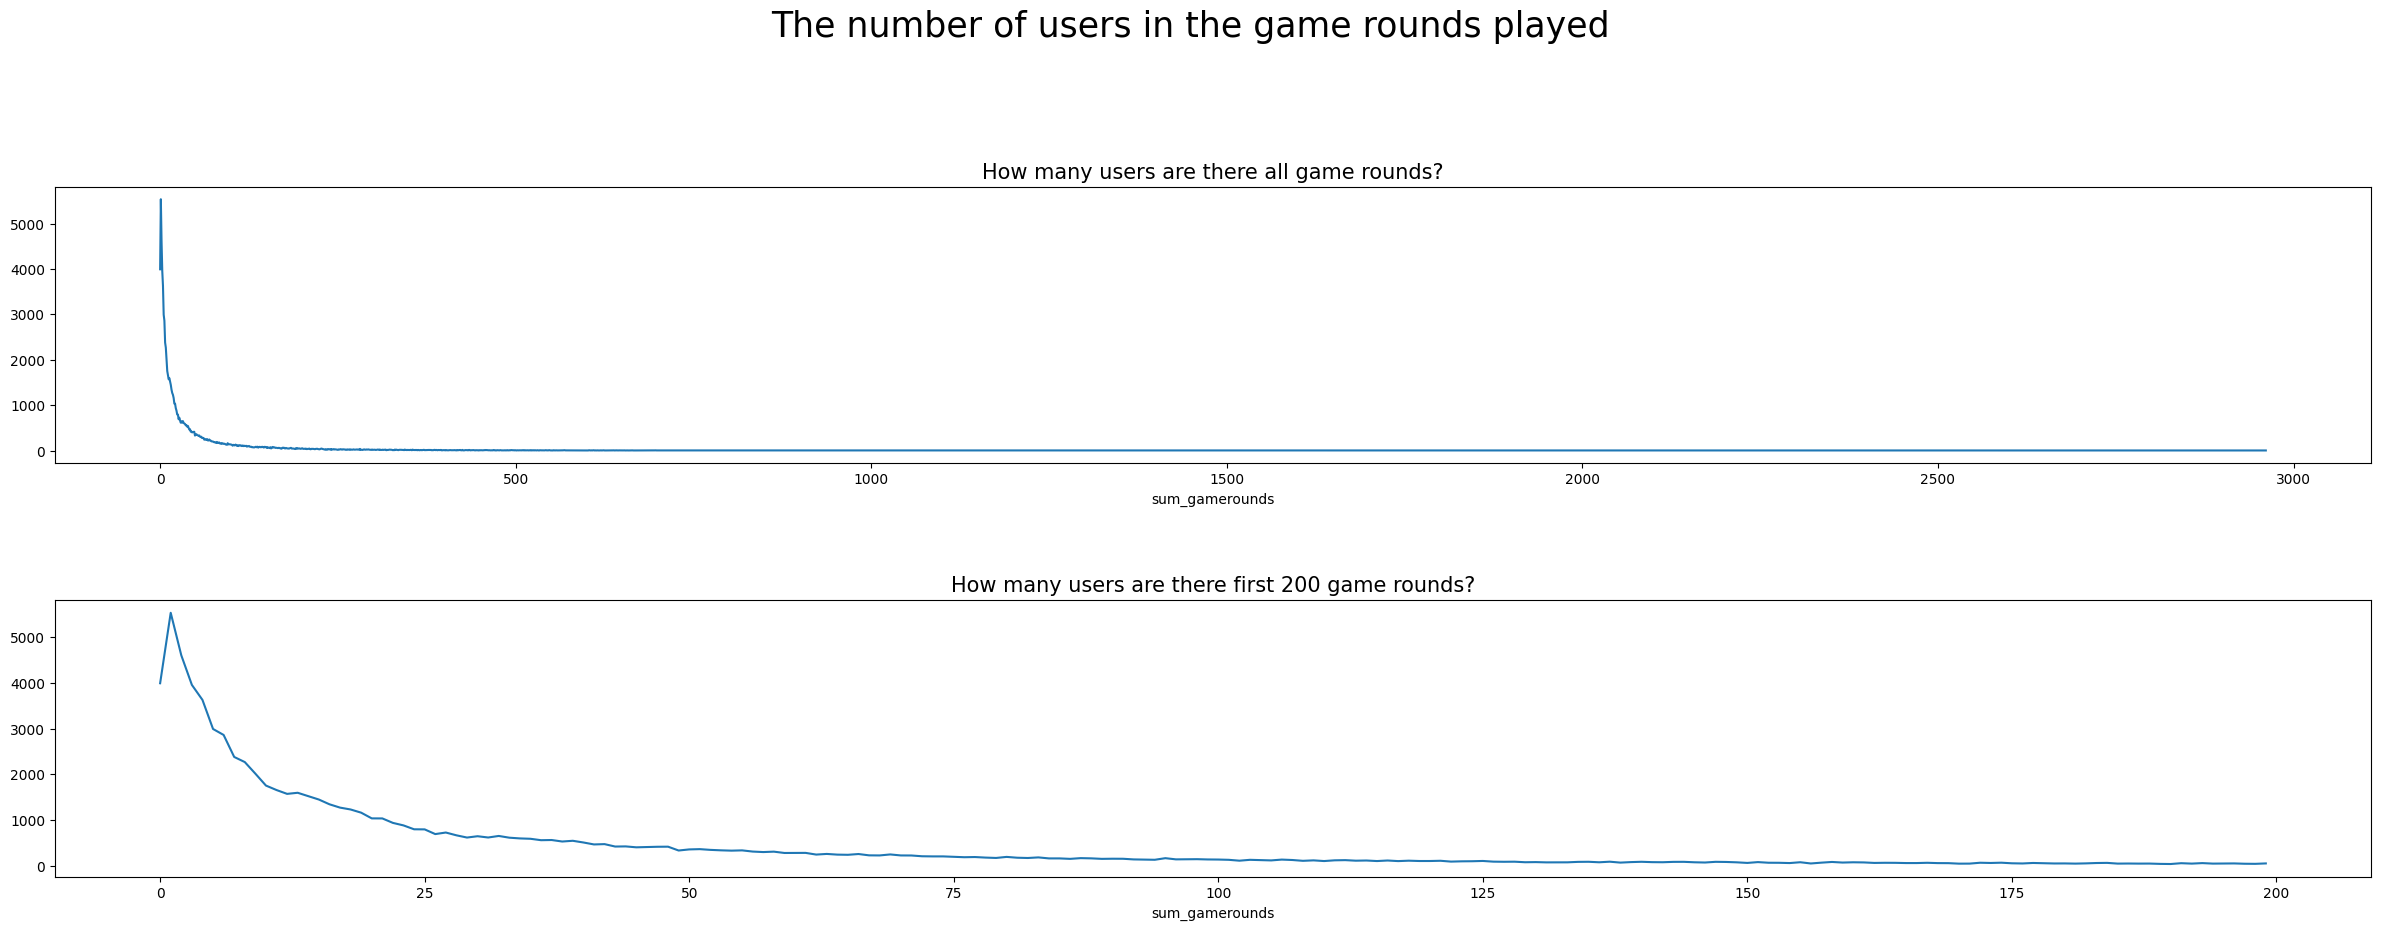

In [27]:
fig, axes = plt.subplots(2, 1, figsize = (25,10))
ab_no_max.groupby("sum_gamerounds").userid.count().plot(ax = axes[0])
ab_no_max.groupby("sum_gamerounds").userid.count()[:200].plot(ax = axes[1])
plt.suptitle("The number of users in the game rounds played", fontsize = 25)
axes[0].set_title("How many users are there all game rounds?", fontsize = 15)
axes[1].set_title("How many users are there first 200 game rounds?", fontsize = 15)
plt.tight_layout(pad=5);

In [28]:
ab.groupby("sum_gamerounds").userid.count().reset_index().head(20)

,sum_gamerounds,userid
0,0,3994
1,1,5538
2,2,4606
3,3,3958
4,4,3629
5,5,2992
6,6,2861
7,7,2379
8,8,2267
9,9,2013


In [35]:
# How many users reached gate 30 & gate 40 levels?
ab_no_max.groupby("sum_gamerounds").userid.count().loc[[30,40]]
## Only lists users who made it to specifically 30 and 40, not 34, 35, etc

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [45]:
ab_reached_40 = ab_no_max[ab_no_max["sum_gamerounds"] >= 40]
ab_reached_40.describe()

,userid,sum_gamerounds
count,27392.0000,27392.0000
mean,5010122.6572,142.3613
std,2878045.3397,150.1854
min,377.0000,40.0000
25%,2530176.5000,57.0000
50%,4995877.5000,91.0000
75%,7494160.2500,166.0000
max,9999768.0000,2961.0000


In [44]:
# A/B Groups & Target Summary Stats
ab_reached_40.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,13565,90.0000,142.0488,149.1508,2961
gate_40,13827,92.0000,142.6678,151.1984,2640


Looking at the summary statistics, the control and Test groups seem similar, but **are the two groups statistically significant**? We will investigate this statistically.

In [31]:
# A/B Groups & Target Summary Stats
ab_no_max.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17.0000,51.3421,102.0576,2961
gate_40,45489,16.0000,51.2988,103.2944,2640


**Retention variables gives us player retention details.**

<li><code>retention_1</code> - did the player come back and play 1 day after installing?</li>
<li><code>retention_7</code> - did the player come back and play 7 days after installing?</li>

Also players tend not to play the game! There are many players who quit the game.

- 55 percent of the players didn't play the game 1 day after insalling
- 81 percent of the players didn't play the game 7 day after insalling

In [47]:
# Retention Problem
pd.DataFrame({"RET1_COUNT": ab_reached_40["retention_1"].value_counts(),
              "RET7_COUNT": ab_reached_40["retention_7"].value_counts(),
              "RET1_RATIO": ab_reached_40["retention_1"].value_counts() / len(ab_reached_40),
              "RET7_RATIO": ab_reached_40["retention_7"].value_counts() / len(ab_reached_40)})

,RET1_COUNT,RET7_COUNT,RET1_RATIO,RET7_RATIO
False,4550,13864,0.1661,0.5061
True,22842,13528,0.8339,0.4939


Looking at the summary statistics of retention variables by version and comparing with sum_gamerounds, there are similarities between groups. However, it will be more helpful to see if there is a statistically significant difference.

In [48]:
ab_reached_40.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median     mean      std   max
version retention_1                                       
gate_30 False         2202 65.0000  94.4373  86.1605  1072
        True         11363 98.0000 151.2753 156.8273  2961
gate_40 False         2348 66.0000  93.9732  81.0345  1241
        True         11479 99.0000 152.6282 160.0328  2640

In [49]:
ab_reached_40.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version retention_7                                        
gate_30 False         6744  66.0000  89.2807  68.1323   981
        True          6821 137.0000 194.2212 184.8746  2961
gate_40 False         7120  68.0000  89.0499  70.2362  2640
        True          6707 141.0000 199.5874 188.6891  2294

Similar results are seen when the number of users who came and did not come 1 day and 7 days after the game was installing. Approximately 12.000 users among the total users played the game both 1 day and 7 days after installing the game. 14% of the total users include people who will continue the game in the future.

In [53]:
ab_reached_40["NewRetention"] = np.where((ab_reached_40.retention_1 == True) & (ab_reached_40.retention_7 == True), 1,0)
ab_reached_40.groupby(["version", "Retention"])["sum_gamerounds"].agg(["count", "median", "mean", "std", "max"])

count   median     mean      std   max
version Retention                                        
gate_30 0           7716  68.0000  93.2718  74.7833  1072
        1           5849 148.0000 206.3955 192.1966  2961
gate_40 0           8085  69.0000  93.1482  76.2018  2640
        1           5742 152.0000 212.3938 196.3754  2294

When the retention variables are combined and the two groups are compared, the summary statistics are similar here as well.

In [55]:
ab_reached_40["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), ab_reached_40.retention_1, ab_reached_40.retention_7))
ab_reached_40.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,1230,56.0000,73.4756,57.9166,981
1,gate_30,False-True,972,84.0000,120.9630,106.3995,1072
2,gate_30,True-False,5514,69.0000,92.8063,69.7262,918
3,gate_30,True-True,5849,148.0000,206.3955,192.1966,2961
4,gate_40,False-False,1383,58.0000,73.4497,47.9221,547
5,gate_40,False-True,965,92.0000,123.3865,105.9466,1241
6,gate_40,True-False,5737,71.0000,92.8105,74.1378,2640
7,gate_40,True-True,5742,152.0000,212.3938,196.3754,2294


<a id='ab'></a>
<h1 style="color:DarkSlateBlue" >6. A/B Testing</h1>

### Assumptions:
- Check normality
- If Normal Distribution, check homogeneity

### Steps:
- Split & Define Control Group & Test Group
- Apply Shapiro Test for normality
- If parametric apply Levene Test for homogeneity of variances
- If Parametric + homogeneity of variances apply T-Test
- If Parametric - homogeneity of variances apply Welch Test
- If Non-parametric apply Mann Whitney U Test directly

In [56]:
# Define A/B groups
ab_reached_40["version"] = np.where(ab_reached_40.version == "gate_30", "A", "B")
ab_reached_40.head()

,userid,version,sum_gamerounds,retention_1,retention_7,Retention,NewRetention
2,377,B,165,True,False,0,True-False
4,488,B,179,True,True,1,True-True
5,540,B,187,True,True,1,True-True
8,1574,B,108,True,True,1,True-True
9,1587,B,153,True,False,0,True-False


In [58]:
# A/B Testing Function - Quick Solution
def hypothesis_Test(dataframe, group, target):
    
    # Packages
    from scipy.stats import shapiro
    import scipy.stats as stats
    
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    if (ntA == False) & (ntB == False): # "H0: Normal Distribution"
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Result
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    
    # Columns
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp
    
    
    
# Apply A/B Testing
hypothesis_Test(dataframe=ab_reached_40, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Fail to Reject H0,0.0576,A/B groups are similar!


<a id='conclusion'></a>
<h1 style="color:DarkSlateBlue" >7. Conclusion</h1>

### Remember business problem!

**As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.**

Firstly, we investigated relationships and structures in the data. There was no missing value problem but was one outlier problem in the data. Summary stats and plots help us to understand the data and problem.

Before A/B Testing, we shared some details about game, players, problems and suggestion to our customer/director/ceo etc.

After applying A/B Testing, the analysis result gives us some important information. Shapiro Testing rejected H0 for Normality assumption. Therefore we needed to apply a Non-parametric test as called Mann Whitney U to compare two groups. As a result, Mann Whitney U Testing rejected H0 hypothesis and we learned A/B groups are not similar!

Briefly, There are statistically significant difference between two groups about moving first gate from level 30 to level 40 for game rounds. 

### Which level has more advantages in terms of player retention?

1-day and 7-day average retention are higher when the gate is at level 30 than when it is at level 40.

In [59]:
ab_reached_40.groupby("version").retention_1.mean(), ab_reached_40.groupby("version").retention_7.mean()

(version
 A   0.8377
 B   0.8302
 Name: retention_1, dtype: float64,
 version
 A   0.5028
 B   0.4851
 Name: retention_7, dtype: float64)

The gate should be at level 30 but average retentions look like similar. We need more data for similarity.